<a href="https://colab.research.google.com/github/mpfmorawski/colab_notebooks/blob/main/PyTorch/Learn_PyTorch/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.0.1+cu118
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

As of my last update in September 2021, computer vision technology has been utilized in various industries to enhance processes, improve efficiency, and enable new applications. Here are three prominent areas where computer vision is being used:

- **Automotive Industry**: Computer vision plays a critical role in advanced driver assistance systems (ADAS) and autonomous vehicles. Cameras installed in vehicles can detect and interpret road signs, lane markings, pedestrians, and other vehicles. This information is used to assist the driver, provide warnings, and enable autonomous functions like lane-keeping, adaptive cruise control, and automatic emergency braking.

- **Retail and E-Commerce**: Computer vision is transforming the retail industry by enabling innovative solutions such as cashier-less checkout systems, where customers can simply pick up items and walk out of the store, and the items are automatically charged to their account. Retailers are also using computer vision to track shopper behavior, analyze foot traffic, optimize store layouts, and personalize marketing strategies based on customer demographics and preferences.

- **Healthcare**: Computer vision is being deployed in various healthcare applications, such as medical imaging analysis. It aids in the early detection and diagnosis of diseases like cancer by analyzing X-rays, MRIs, CT scans, and histopathological images. Computer vision also facilitates surgery by providing surgeons with real-time augmented information during procedures. Additionally, it's used in tracking patient movement, monitoring vital signs, and ensuring adherence to hygiene protocols.

Please note that computer vision is a rapidly evolving field, and there may be other industries and applications where it is being used beyond the examples provided here.

*Source: ChatGPT*

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning refers to a scenario where a model is excessively trained on a specific dataset to the point that it memorizes the noise and outliers, leading to poor generalization and performance on new, unseen data.

Source: ChatGPT

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Three ways to prevent overfitting in machine learning:

- **Cross-Validation**: Cross-validation involves dividing the dataset into multiple subsets or "folds." The model is trained on different combinations of these folds and evaluated on the remaining data. This technique helps to assess the model's performance more accurately and reduces the risk of overfitting.

- **Regularization**: Regularization techniques, such as L1 and L2 regularization, add penalty terms to the model's loss function based on the magnitude of its parameters. By doing so, the model is discouraged from assigning overly complex weights to features, which can help prevent overfitting.

- **Data Augmentation**: Data augmentation involves artificially increasing the size of the training dataset by applying various transformations to the existing data, such as rotations, translations, and flips. This process can help the model generalize better by exposing it to a wider range of variations in the data.

These methods, among others, are essential tools in a machine learning practitioner's arsenal to address overfitting issues and build more robust models.

*Source: ChatGPT*

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Input image:

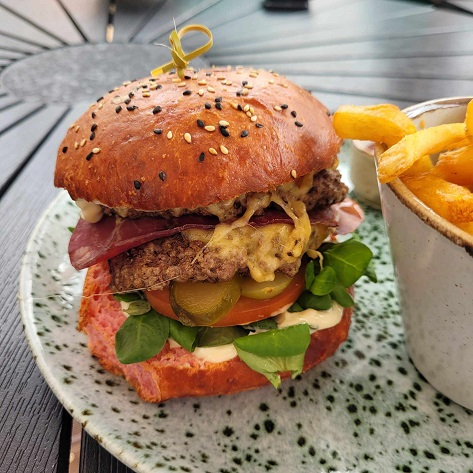

CNN Explainer Screenshot:

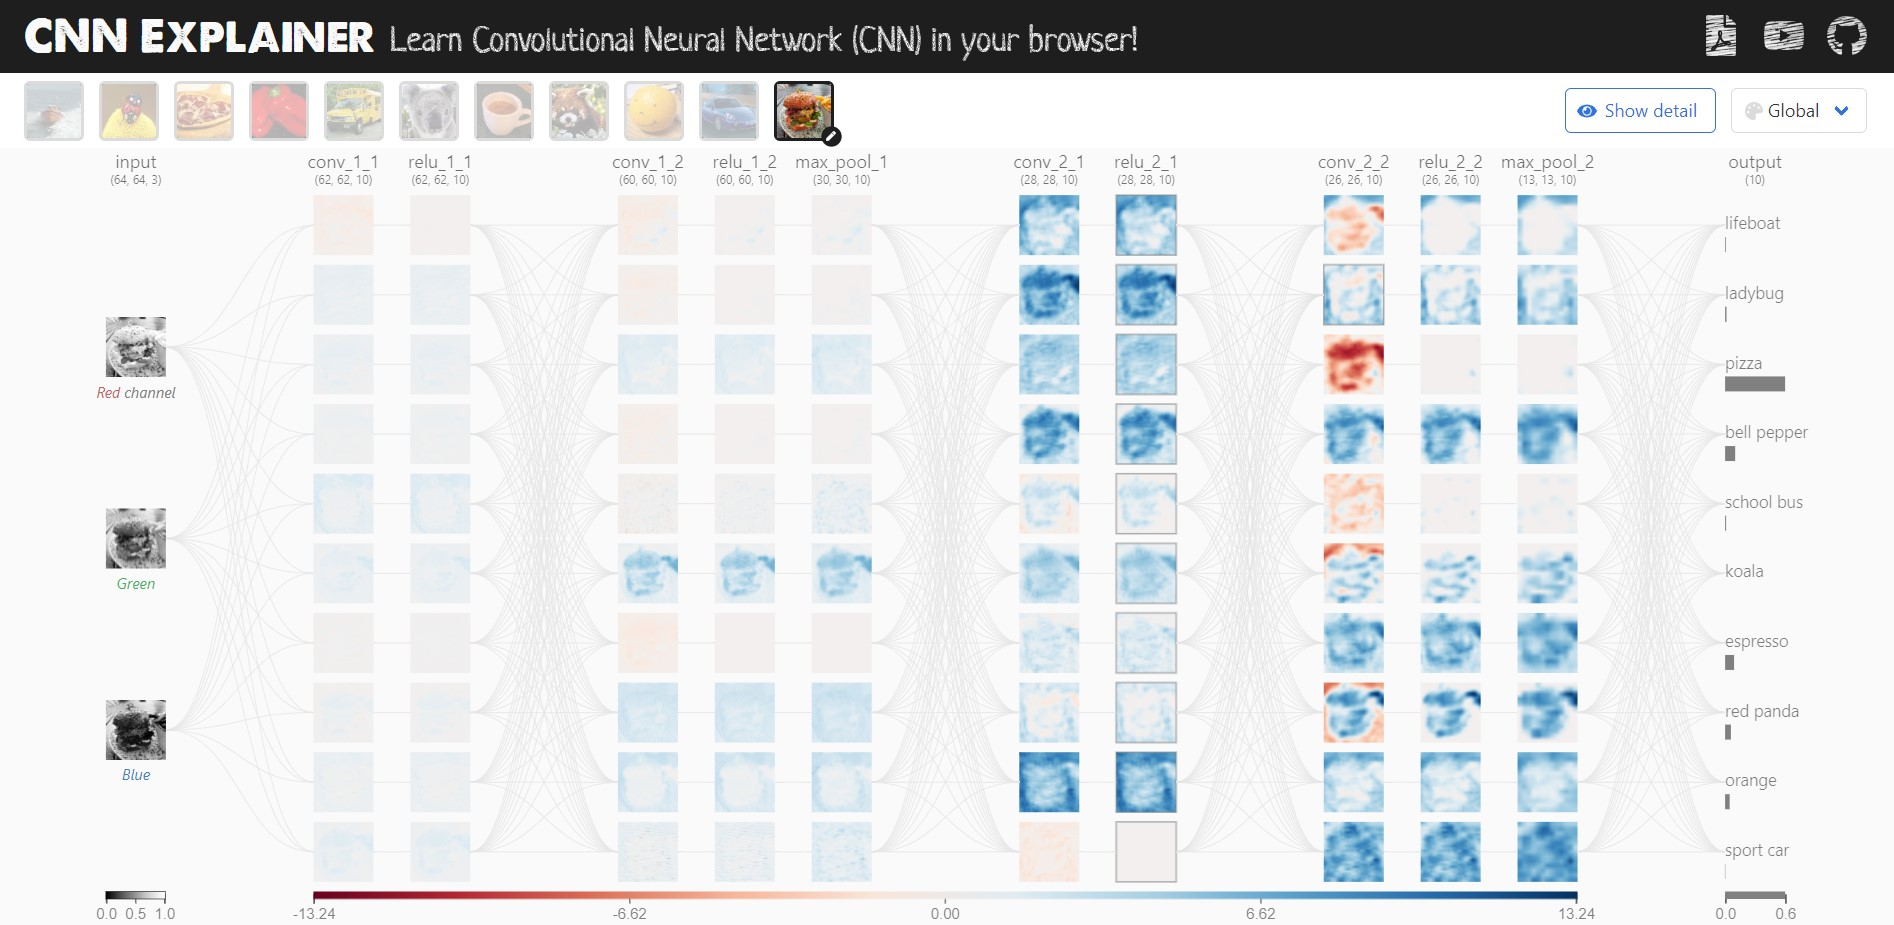

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [11]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 9912422/9912422 [00:00<00:00, 213885531.37it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 25147538.68it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 175054835.77it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 5490065.93it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

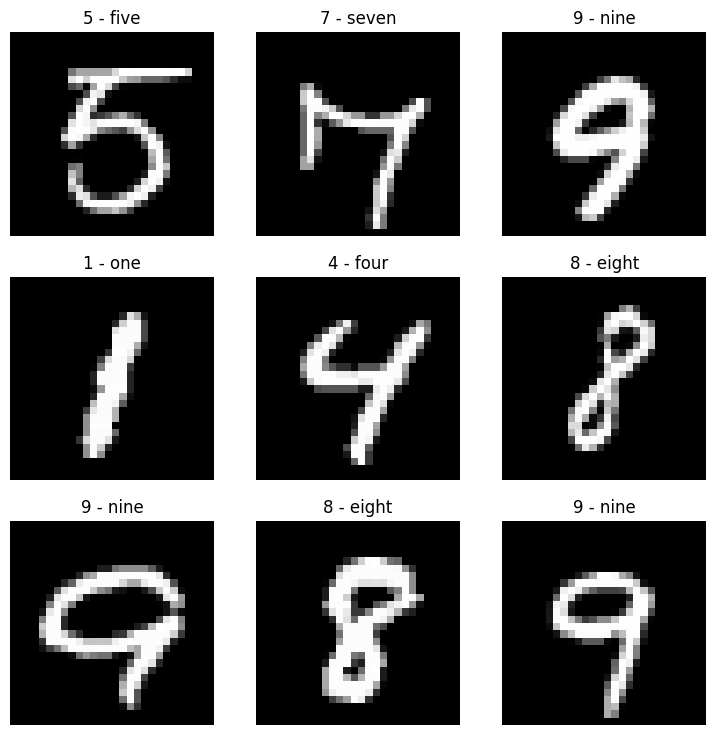

In [14]:
import matplotlib.pyplot as plt

class_names = train_data.classes

fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [49]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [50]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [51]:
from torch import nn

class MNISTModel(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [52]:
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

In [53]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1),
                             y) # go from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [54]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1),
                              y) # go from logits -> prediction labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


### CPU

In [55]:
device = "cpu"

In [56]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_cpu = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cpu.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [57]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_cpu,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_cpu,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_cpu = timer()

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.33561 | Train acc: 0.89%
Test loss: 0.07362 | Test acc: 0.98%

Epoch: 1
-------
Train loss: 0.08217 | Train acc: 0.97%
Test loss: 0.06596 | Test acc: 0.98%

Epoch: 2
-------
Train loss: 0.06436 | Train acc: 0.98%
Test loss: 0.05947 | Test acc: 0.98%

Epoch: 3
-------
Train loss: 0.05594 | Train acc: 0.98%
Test loss: 0.06140 | Test acc: 0.98%

Epoch: 4
-------
Train loss: 0.04984 | Train acc: 0.98%
Test loss: 0.04684 | Test acc: 0.98%



In [58]:
print(f"Training on {device}: {train_time_end_on_cpu - train_time_start_on_cpu:.3f} seconds")

Training on cpu: 224.506 seconds


### GPU

In [63]:
device = "cuda"

In [64]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_gpu = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_gpu.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

In [65]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_gpu,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_gpu,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.33469 | Train acc: 0.89%
Test loss: 0.07268 | Test acc: 0.98%

Epoch: 1
-------
Train loss: 0.08084 | Train acc: 0.97%
Test loss: 0.06296 | Test acc: 0.98%

Epoch: 2
-------
Train loss: 0.06369 | Train acc: 0.98%
Test loss: 0.05473 | Test acc: 0.98%

Epoch: 3
-------
Train loss: 0.05435 | Train acc: 0.98%
Test loss: 0.05840 | Test acc: 0.98%

Epoch: 4
-------
Train loss: 0.04875 | Train acc: 0.98%
Test loss: 0.04609 | Test acc: 0.98%



In [66]:
print(f"Training on {device}: {train_time_end_on_gpu - train_time_start_on_gpu:.3f} seconds")

Training on cuda: 68.046 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?